In [1]:
import os
import numpy as np
import pandas as pd
import nibabel as nib
import glob
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mpimg
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score

In [58]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D,Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
 
# initialize the model
model = Sequential()

#first layer
model.add(Conv2D(96, 5, 5, border_mode="same",
    input_shape=(64, 64,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#second layer
model.add(Conv2D(144, 5, 5, border_mode="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#set of FC
model.add(Flatten())
model.add(Dense(1000))
model.add(Activation("relu"))

# softmax classifier
model.add(Dense(3))
model.add(Activation("softmax"))

#get model summary
model.summary()

# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

/home/siddhant/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (5, 5), padding="same", input_shape=(64, 64, 3...)`
/home/siddhant/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(144, (5, 5), padding="same")`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 64, 64, 96)        7296      
_________________________________________________________________
activation_8 (Activation)    (None, 64, 64, 96)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 144)       345744    
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 144)       0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 144)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 36864)             0         
__________

In [59]:
model.load_weights('/home/siddhant/work/source/DeepNeuralnets--Alzheimer/Le-Net_model_weights')

In [60]:
files_path ='/home/siddhant/SharedFolder/DATA/Data/test/A47_031_S_4024/ADNI_031_S_4024_MR_Resting_State_fMRI_br_raw_20110804161041980_5169_S117502_I248870.nii'

In [61]:
x_test = nib.load(files_path).get_data()

In [62]:
x_test.shape

(64, 64, 48, 140)

In [63]:
x_test = np.transpose(x_test, (3, 0, 1, 2))

In [65]:
def i16_to_rgb(array):
    img=Image.fromarray(np.asarray(array),'I;16')
    im2=img.convert('RGB')
    rgb_array=np.asarray(im2)
    return rgb_array

In [66]:
x_test2=map(i16_to_rgb,x_test)

In [68]:
pred=model.predict_classes(np.asarray(x_test2))

140/140 [==============================] - 3s     


In [69]:
 pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [13]:
b.shape

(140, 64, 64, 48)

In [8]:
del(temp_file)

In [46]:
img=Image.open('/home/siddhant/SharedFolder/DATA/Data/converted_data/alzhiemer/all/0_0.jpg')

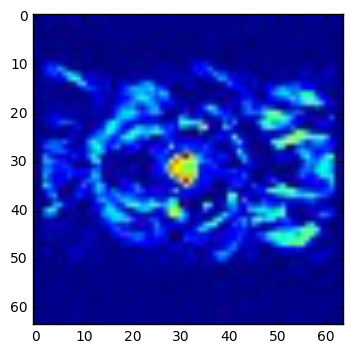

In [49]:
plt.show(img)

In [50]:
img.mode

'RGB'

In [53]:
img.size

(64, 64)

In [56]:
a=np.asarray(img)
a.shape

(64, 64, 3)

In [57]:
a


array([[[  1,   0, 132],
        [  4,   0, 134],
        [  7,   0, 139],
        ..., 
        [  1,   0, 140],
        [  2,   0, 132],
        [  4,   0, 126]],

       [[  3,   0, 120],
        [  0,   0, 131],
        [  0,   0, 143],
        ..., 
        [  1,   0, 141],
        [  1,   0, 134],
        [  0,   0, 128]],

       [[  5,   0, 112],
        [  0,   2, 127],
        [  0,   4, 140],
        ..., 
        [  2,   0, 137],
        [  1,   0, 133],
        [  0,   0, 126]],

       ..., 
       [[  0,   1, 122],
        [  0,   0, 130],
        [  1,   0, 138],
        ..., 
        [  1,   0, 130],
        [  0,   0, 126],
        [  0,   0, 123]],

       [[  0,   0, 125],
        [  0,   0, 133],
        [  0,   0, 141],
        ..., 
        [  1,   0, 134],
        [  1,   0, 129],
        [  0,   0, 125]],

       [[  0,   0, 129],
        [  0,   0, 135],
        [  1,   0, 142],
        ..., 
        [  3,   0, 140],
        [  1,   0, 133],
        [  1,   0,